In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from source.models import Models
from source.morph2 import Morph
from source.generation import Generation

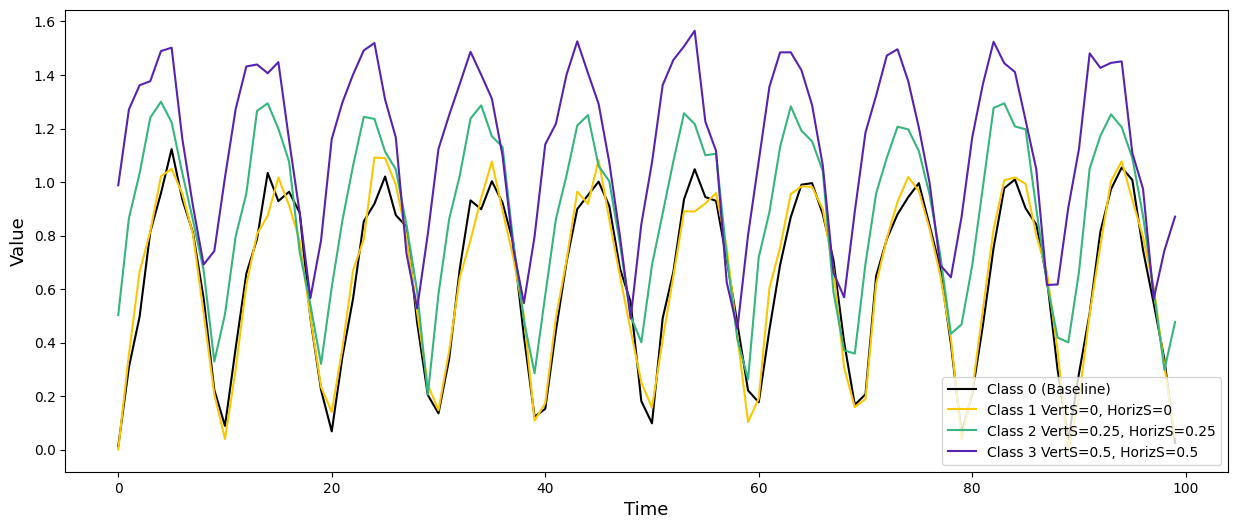

In [ ]:
shift_values = [0, 0.25, 0.5]
horiz = [1, 2, 3]
colors =['#FAC801', "#36B57C", "#5722B1"] 

plt.figure(figsize=(15, 6))

gen = Generation(base_functions=('sin', 'sin'), n_samples=2, frequencies=(0.5,0.5), noise_level=(0.05, 0.05)) 
X, y = gen.generate_data()
plt.plot(X[1].T, label=f'Class 0 (Baseline)', color='black')  # Assign color and label


for i, s in enumerate(shift_values):
    gen = Generation(base_functions=('sin', 'sin'), n_samples=2, frequencies=(0.5,0.5), noise_level=(0.05, 0.05), shift_vert=s, shif_horz=s) 
    X, y = gen.generate_data()
    plt.plot(X[0].T, color=colors[i], label=f'Class {i+1} VertS={s}, HorizS={s}')  # Assign color and label


plt.legend(loc='lower right')  # Show legend
plt.xlabel('Time', fontsize=13)
plt.ylabel('Value', fontsize=13)
#plt.title('Plot with Different Shift Values')
plt.show()

## Shift and Percentage Borderline Pairs Loop


In [ ]:
shift_values = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]
results = {}
for s in shift_values:
    # Generate dataset with shift
    gen = Generation(base_functions=('sin', 'cos'), n_samples=100, frequencies=(0.5,0.5), noise_level=(0.1, 0.1), shift_vert=s, shif_horz=s) 
    X, y = gen.generate_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models
    lstm = Models('lstm', X_train, y_train.ravel())
    lstm.train_lstm()
    catch22 = Models('catch22', X_train, y_train)
    catch22.train_catch22()
    rocket = Models('rocket', X_train, y_train)
    rocket.train_rocket()
 
    # Calculate morphing
    res = {}
    morph = Morph(X_test, y_test)
    morph.get_DTWGlobalBorderline(X_test.shape[0]) 
    print(X_test.shape[0])

    models = [lstm, catch22, rocket]
    res = morph.Binary_MorphingCalculater(models)

    results[s] = res


with open('article_results/correct.pkl', 'wb') as f:
    pickle.dump(results, f)

d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:01<00:00,  1.54s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:01<00:00,  1.55s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:07<00:00,  1.69s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:01<00:00,  1.53s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [00:59<00:00,  1.49s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:01<00:00,  1.55s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [00:59<00:00,  1.50s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:00<00:00,  1.52s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:00<00:00,  1.50s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:00<00:00,  1.52s/it]
d:\UNI\L_IACD\3_Year\2_Semester\INV\Morphing\source\models.py:181: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.catch22_train, self.y_train)
c:\Users\anton\anaconda3\envs\morph\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


100%|██████████| 40/40 [01:03<00:00,  1.58s/it]


In [9]:
with open('article_results/correct.pkl', 'wb') as f:
    pickle.dump(results, f)

columns = ['shift_val', 'model', 'mean', 'std']

data = []
for shift_val in results.keys():
    for model in results[shift_val].keys():
        metrics = results[shift_val][model]['metrics']
        line = [shift_val, model, metrics['mean'], metrics['std']]
        data.append(line)

# save to csv
df = pd.DataFrame(data, columns=columns)
df.to_csv('article_results/correct.csv', index=False)

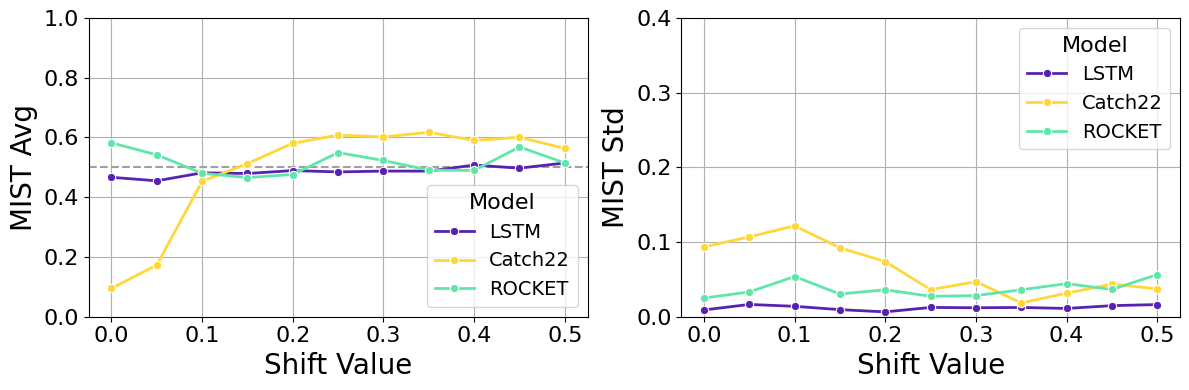

In [10]:
colors = ["#5722B1", '#FFD738', "#61E6AA"]
markers = ['o', 's', 'D']
custom_legend_labels = ["LSTM", "Catch22", "ROCKET"]  

subset = df
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].axhline(y=0.5, color='#A0A0A0', linestyle='--')

# Plot Mean Morphing Percentage
sns.lineplot(
    data=subset, x="shift_val", y="mean", 
    hue="model", marker='o', 
    palette=colors, ax=axes[0], linewidth=2
)

# Fix axis limit 
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[0].set_xlabel("Shift Value", fontsize=20)
axes[0].set_ylabel("MIST Avg", fontsize=20)
    
# Set custom legend for the first subplot
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, custom_legend_labels, title="Model", fontsize=14, title_fontsize=16)
axes[0].grid(True)

# Plot Standard Deviation
sns.lineplot(
    data=subset, x="shift_val", y="std", 
    hue="model", 
    palette=colors, marker='o', ax=axes[1], linewidth=2
)
    
# Fix axis limit and increase font size
axes[1].set_ylim(0, 0.4)
axes[1].tick_params(axis='both', which='major', labelsize=16)    
axes[1].set_xlabel("Shift Value", fontsize=20)
axes[1].set_ylabel("MIST Std", fontsize=20)
    
# Set custom legend for the second subplot
handles, _ = axes[1].get_legend_handles_labels()
axes[1].legend(handles, custom_legend_labels, title="Model", fontsize=14, title_fontsize=16)
axes[1].grid(True)

plt.tight_layout()
plt.show()